In [74]:
# Exercise 6

#For this exercise you can use either Python with sklearn or Weka.

#Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?

#Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?

#Do you see any overlap between the PCA features and those obtained from feature selection?

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [76]:
df = pd.read_csv('agaricus-lepiota.data')
df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


(4208, 23)


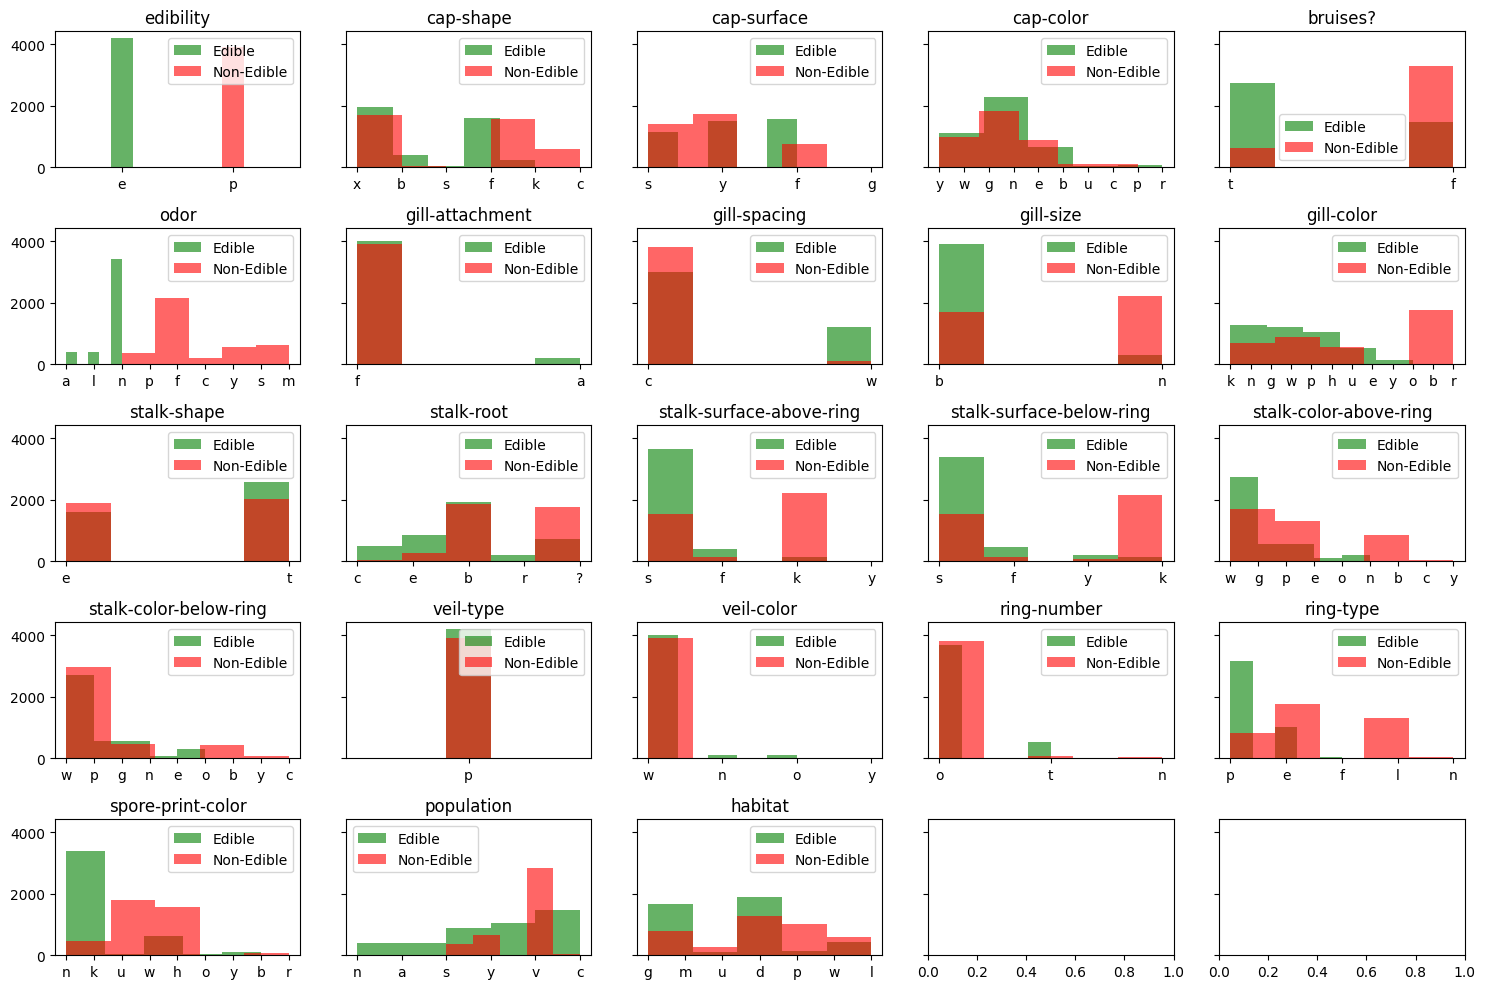

In [77]:
edible = df[df['edibility'] == 'e']
non_edible = df[df['edibility'] == 'p']

print(edible.shape)
numb_of_columns  = math.ceil(len(df.columns)/5)
fig, axs = plt.subplots(5, numb_of_columns, sharey=True, tight_layout=True, figsize=(15, 10))

for i, h in enumerate(df.columns):
    row = i // numb_of_columns 
    col = i % numb_of_columns 
    axs[row, col].set_title(h)
    axs[row, col].hist(edible[h], bins=5, color="green", alpha=0.6, label='Edible')
    axs[row, col].hist(non_edible[h], bins=5, color="red", alpha=0.6, label='Non-Edible')
    axs[row, col].legend()


In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df contains your data
df_dummy = pd.get_dummies(df)

# Feature selection
skb = SelectKBest(chi2, k=6)
X = df_dummy.values
Y = df_dummy[['edibility_e', 'edibility_p']]

skb.fit(X, Y)

selected_indices = skb.get_support(indices=True)
selected_features = df_dummy.columns[selected_indices]
print("Selected Features:", " , ".join(selected_features))

Selected Features: edibility_e , edibility_p , odor_f , odor_n , stalk-surface-above-ring_k , stalk-surface-below-ring_k


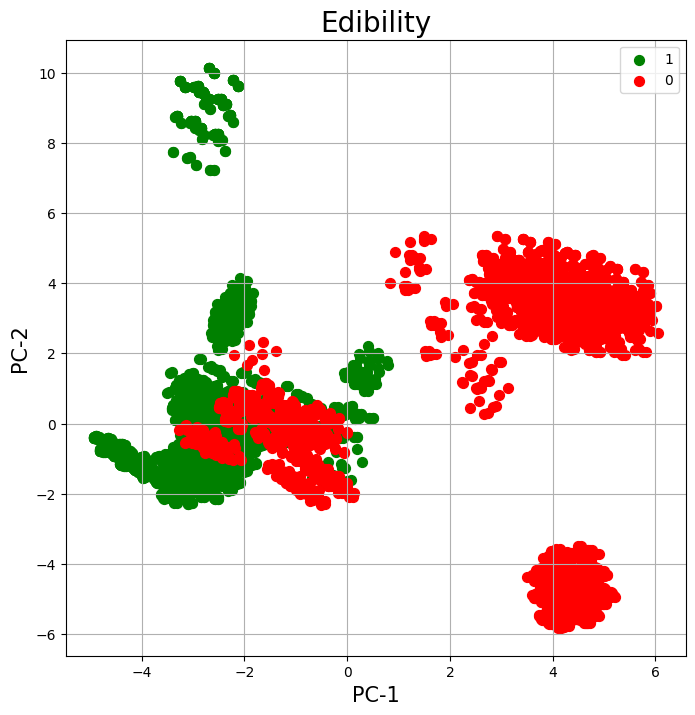

In [79]:
from sklearn import preprocessing
from sklearn import decomposition

# Scale the data
data_scaled = preprocessing.scale(df_dummy)
df_scaled = pd.DataFrame(data_scaled, columns=df_dummy.columns)

# Apply PCA on the scaled data
pca = decomposition.PCA(n_components=2)
pca.fit(df_scaled)

# Transform the scaled data using PCA
Xpca = pca.transform(df_scaled)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=Xpca, columns=['PC-1', 'PC-2'])

# Combine principal components with the target variable
finalDf = pd.concat([pc_df, df_dummy[['edibility_e']]], axis=1)

# Plot the PCA results
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC-1', fontsize=15)
ax.set_ylabel('PC-2', fontsize=15)
ax.set_title('Edibility', fontsize=20)
targets = [1, 0]
colors = ['g', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['edibility_e'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
               , finalDf.loc[indicesToKeep, 'PC-2']
               , c=color
               , s=50)
ax.legend(targets)
plt.grid()
plt.show()

In [87]:
pca = PCA(n_components=6)
Xpca = pca.fit_transform(df_dummy)

best_features = [pca.components_[i].argmax() for i in range(Xpca.shape[1])] #Finds the n with the highest values for each feature
feature_names = [df_dummy.columns[best_features[i]] for i in range(Xpca.shape[1])] #Maps value to name
print(feature_names)

['edibility_p', 'stalk-root_b', 'habitat_g', 'stalk-shape_t', 'odor_n', 'cap-shape_f']


In [88]:
print(set(feature_names).intersection(selected_features))

{'odor_n', 'edibility_p'}
